In [11]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.models import model_from_json, Sequential
import os
from sklearn.model_selection import train_test_split
import csv
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [14]:
gibberish = pd.read_csv("./Gibberish.csv", encoding = "ISO-8859-1")
amazon = pd.read_csv("./Amazon.csv", encoding = "ISO-8859-1")

In [15]:
gibberish.head()

,Response,Label
0,ggg,1
1,hgghghghghghghhg,1
2,ufdhgjndfnvbhfdjvnjkmfgbdfg,1
3,dbdbdbd,1
4,dfgdfgd,1


In [16]:
amazon.head()

,__label__2,Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,__label__2,The best soundtrack ever to anything.: I'm rea...
1,__label__2,Amazing!: This soundtrack is my favorite music...
2,__label__2,Excellent Soundtrack: I truly like this soundt...
3,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."
4,__label__2,an absolute masterpiece: I am quite sure any o...


In [17]:
amazon.drop(amazon.columns[0], inplace=True, axis=1)
amazon.columns = ["Response"]
amazon["Label"] = 0
amazon.head()

,Response,Label
0,The best soundtrack ever to anything.: I'm rea...,0
1,Amazing!: This soundtrack is my favorite music...,0
2,Excellent Soundtrack: I truly like this soundt...,0
3,"Remember, Pull Your Jaw Off The Floor After He...",0
4,an absolute masterpiece: I am quite sure any o...,0


In [20]:
len(gibberish), len(amazon)

(3767, 80718)

In [21]:
def remove_intro(x):
  if x.find(":") < 0:
    return x
  else:
    return x[x.find(":") + 1:len(x)].strip()

In [22]:
amazon["Response"] = amazon["Response"].apply(remove_intro)

In [23]:
X = np.concatenate((amazon["Response"].values, gibberish["Response"].values))
Y = np.concatenate((amazon["Label"].values, gibberish["Label"].values))

In [24]:
len(X), len(Y)

(84485, 84485)

In [25]:
pd.DataFrame({"Response": X, "Label" : Y} ).groupby("Label")["Response"].apply(lambda x: np.mean(x.str.len()))

Label
0    399.891350
1     17.089196
Name: Response, dtype: float64

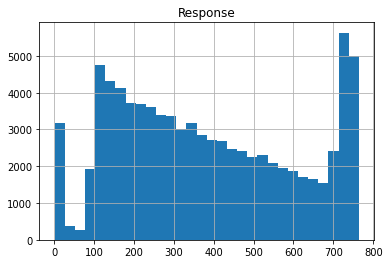

(627.0, 352.0)

In [26]:
response_word_count = []

for i in range(len(X)):
  response_word_count.append(len(str(X[i])))
  
length_df = pd.DataFrame({"Response": response_word_count})
length_df.hist(bins=30)

plt.show()
np.percentile(response_word_count, 80), np.median(response_word_count)

In [27]:
max_len = 256

In [28]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(X)

In [29]:
tokenizer.word_index

{'\x18': 92,
 ' ': 1,
 '!': 31,
 '"': 28,
 '#': 57,
 '$': 51,
 '%': 54,
 '&': 50,
 "'": 26,
 '(': 36,
 ')': 34,
 '*': 52,
 '+': 53,
 ',': 25,
 '-': 29,
 '.': 22,
 '/': 45,
 '0': 33,
 '1': 37,
 '2': 38,
 '3': 41,
 '4': 44,
 '5': 40,
 '6': 46,
 '7': 49,
 '8': 47,
 '9': 43,
 ':': 42,
 ';': 48,
 '<': 64,
 '=': 60,
 '>': 62,
 '?': 39,
 '@': 63,
 '[': 55,
 '\\': 71,
 ']': 56,
 '^': 66,
 '_': 58,
 '`': 59,
 'a': 5,
 'b': 20,
 'c': 14,
 'd': 12,
 'e': 2,
 'f': 18,
 'g': 17,
 'h': 10,
 'i': 6,
 'j': 27,
 'k': 24,
 'l': 11,
 'm': 15,
 'n': 8,
 'o': 4,
 'p': 21,
 'q': 35,
 'r': 9,
 's': 7,
 't': 3,
 'u': 13,
 'v': 23,
 'w': 19,
 'x': 30,
 'y': 16,
 'z': 32,
 '{': 69,
 '|': 79,
 '}': 68,
 '~': 61,
 '\x83': 88,
 '\x85': 82,
 '\x92': 89,
 '¡': 70,
 '£': 81,
 '¥': 87,
 'ª': 83,
 '´': 94,
 '¼': 91,
 '¿': 73,
 '×': 95,
 'á': 75,
 'ä': 85,
 'æ': 74,
 'ç': 72,
 'é': 90,
 'ë': 77,
 'ì': 84,
 'í': 65,
 'ñ': 67,
 'ó': 86,
 'ô': 80,
 'ö': 76,
 'ú': 96,
 'ü': 78,
 'ÿ': 93}

In [30]:
X = tokenizer.texts_to_sequences(X)

In [31]:
X[1]

[3,
 10,
 6,
 7,
 1,
 7,
 4,
 13,
 8,
 12,
 3,
 9,
 5,
 14,
 24,
 1,
 6,
 7,
 1,
 15,
 16,
 1,
 18,
 5,
 23,
 4,
 9,
 6,
 3,
 2,
 1,
 15,
 13,
 7,
 6,
 14,
 1,
 4,
 18,
 1,
 5,
 11,
 11,
 1,
 3,
 6,
 15,
 2,
 25,
 1,
 10,
 5,
 8,
 12,
 7,
 1,
 12,
 4,
 19,
 8,
 22,
 1,
 3,
 10,
 2,
 1,
 6,
 8,
 3,
 2,
 8,
 7,
 2,
 1,
 7,
 5,
 12,
 8,
 2,
 7,
 7,
 1,
 4,
 18,
 1,
 28,
 21,
 9,
 6,
 7,
 4,
 8,
 2,
 9,
 7,
 1,
 4,
 18,
 1,
 18,
 5,
 3,
 2,
 28,
 1,
 36,
 19,
 10,
 6,
 14,
 10,
 1,
 15,
 2,
 5,
 8,
 7,
 1,
 5,
 11,
 11,
 1,
 3,
 10,
 2,
 1,
 15,
 4,
 9,
 2,
 1,
 6,
 18,
 1,
 16,
 4,
 13,
 26,
 23,
 2,
 1,
 21,
 11,
 5,
 16,
 2,
 12,
 1,
 3,
 10,
 2,
 1,
 17,
 5,
 15,
 2,
 34,
 1,
 5,
 8,
 12,
 1,
 3,
 10,
 2,
 1,
 10,
 4,
 21,
 2,
 1,
 6,
 8,
 1,
 28,
 5,
 1,
 12,
 6,
 7,
 3,
 5,
 8,
 3,
 1,
 21,
 9,
 4,
 15,
 6,
 7,
 2,
 28,
 1,
 5,
 8,
 12,
 1,
 28,
 17,
 6,
 9,
 11,
 1,
 19,
 10,
 4,
 1,
 7,
 3,
 4,
 11,
 2,
 1,
 3,
 10,
 2,
 1,
 7,
 3,
 5,
 9,
 28,
 1,
 10,
 5,
 23,
 2,
 1,
 20,
 2,
 2

In [32]:
X = pad_sequences(X, maxlen=max_len, padding="post")

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.10)

In [34]:
vocab_size = len(tokenizer.word_index) + 1

In [35]:
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, 64),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [36]:
history = model.fit(np.array(x_train), y_train, epochs=5, validation_data=(np.array(x_test), y_test), verbose=1)

Epoch 1/5
2377/2377 [==============================] - 9s 3ms/step - loss: 0.0202 - acc: 0.9965 - val_loss: 0.0030 - val_acc: 0.9992
Epoch 2/5
2377/2377 [==============================] - 10s 4ms/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.0023 - val_acc: 0.9994
Epoch 3/5
2377/2377 [==============================] - 8s 3ms/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0018 - val_acc: 0.9995
Epoch 4/5
2377/2377 [==============================] - 8s 3ms/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0016 - val_acc: 0.9996
Epoch 5/5
2377/2377 [==============================] - 8s 3ms/step - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0017 - val_acc: 0.9996


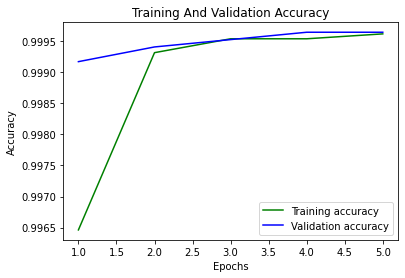

In [37]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
def predict_result(text):
    result = {0:"MEANINGFUL", 1: "GIBBERISH"}
    result = model.predict(pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=max_len, padding="post"))
    if (result[0][0] >= result[0][1]):
      return "MEANINGFUL"
    else:
      return "GIBBERISH"

'MEANINGFUL'

In [58]:
predict_result("Hello, I saw someone selling drugs in this corner")

'MEANINGFUL'

In [59]:
predict_result("efwefewfewewewew")

'GIBBERISH'

In [61]:
model.save('./gibberish_detector')

['.config', 'gibberish_detector', 'Amazon.csv', 'Gibberish.csv', 'sample_data']
